In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math

In [12]:
df_bio_main = pd.read_csv('working_datasets/cleaned_biometrics_data.csv')
df_demo_main = pd.read_csv('working_datasets/cleaned_demographics_data.csv')
df_enrol_main = pd.read_csv('working_datasets/cleaned_enrolment_data.csv')

In [34]:
from matplotlib.patches import Patch

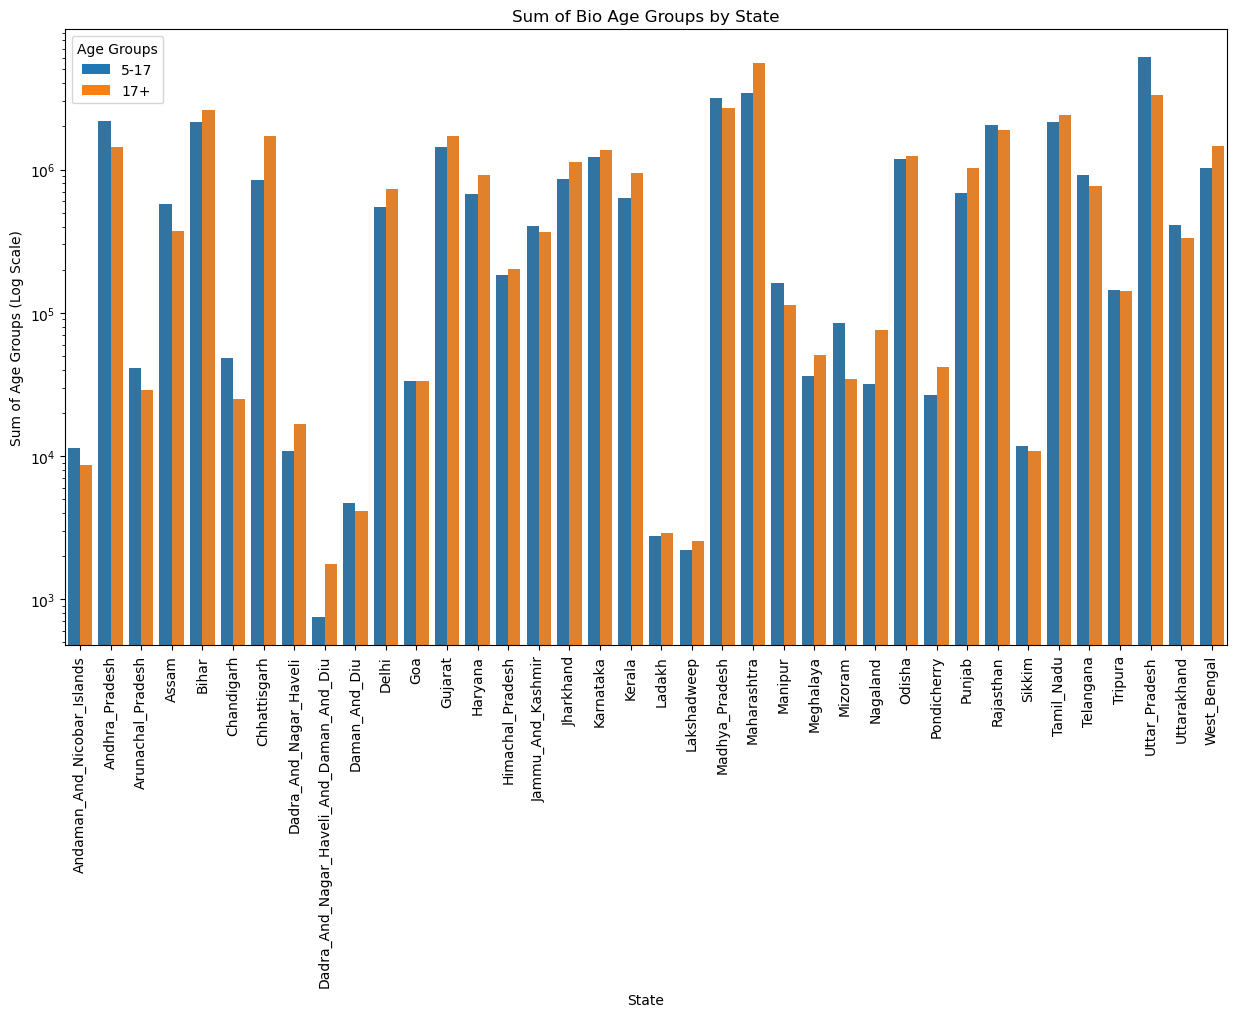

In [37]:
state_bio_age = df_bio_main.groupby('state')[['bio_age_5_17', 'bio_age_17_']].sum().reset_index()

plt.figure(figsize=(15,8))


sns.barplot(
    data=state_bio_age.melt(
        id_vars='state',
        value_vars=['bio_age_5_17', 'bio_age_17_']
    ),
    x='state',
    y='value',
    hue='variable',
    palette = ['#1f77b4', '#ff7f0e']
)

plt.yscale('log')
plt.title('Sum of Bio Age Groups by State')
plt.xlabel('State')
plt.ylabel('Sum of Age Groups (Log Scale)')
plt.xticks(rotation=90)

# Custom legend labels (colors already applied)
plt.legend(title='Age Groups', labels=['5-17', '17+'])

legend_elements = [
    Patch(facecolor='#1f77b4', label='5-17'),
    Patch(facecolor='#ff7f0e', label='17+')
]
plt.legend(handles=legend_elements, title='Age Groups')
plt.savefig('graphs/state_bio_age_groups.png', dpi=300)
plt.show()


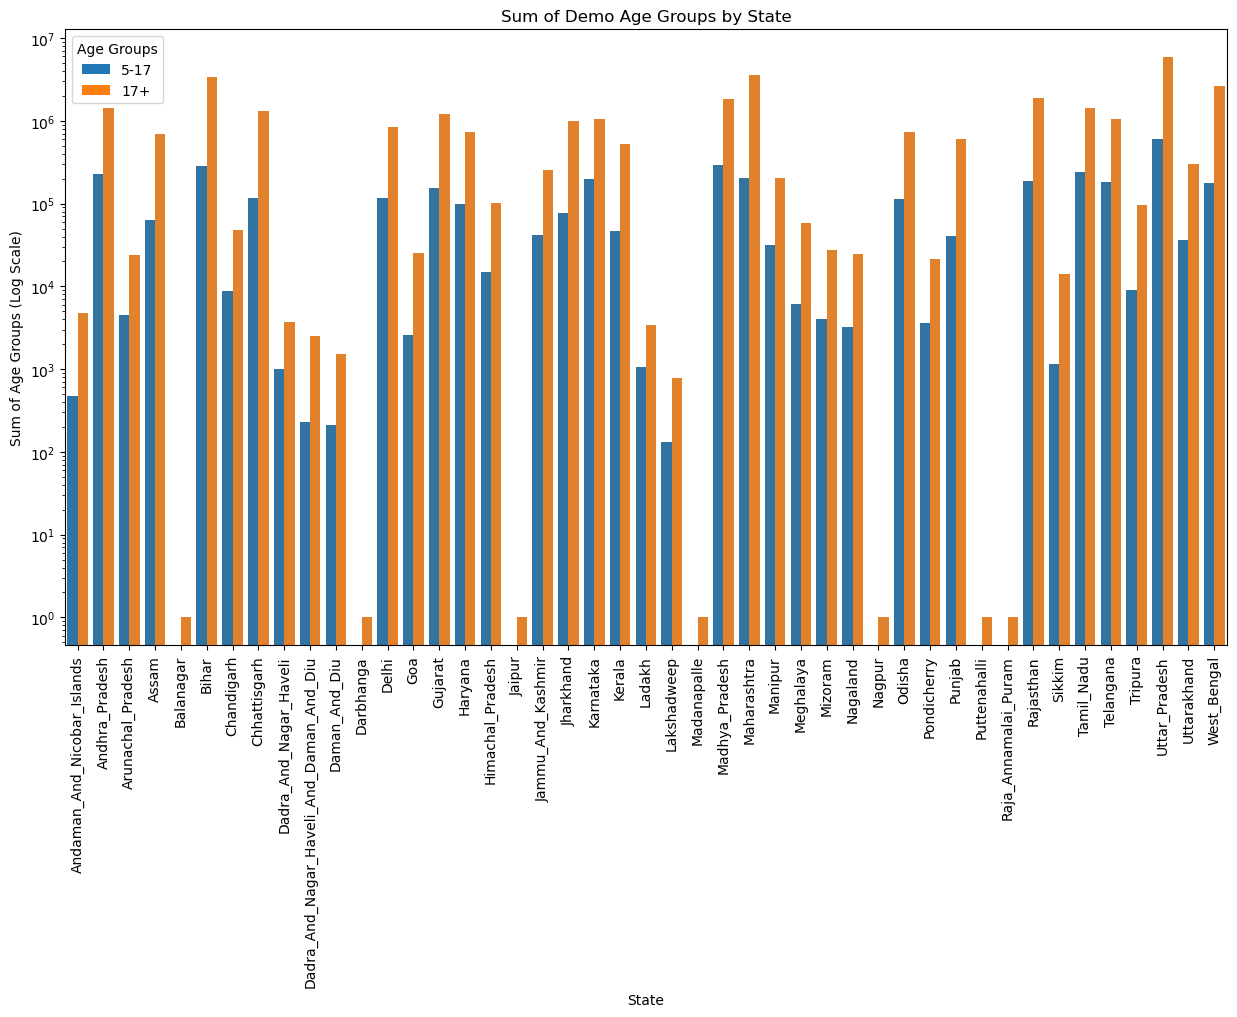

In [38]:
state_demo_age = df_demo_main.groupby('state')[['demo_age_5_17', 'demo_age_17_']].sum().reset_index()

plt.figure(figsize=(15,8))


sns.barplot(
    data=state_demo_age.melt(
        id_vars='state',
        value_vars=['demo_age_5_17', 'demo_age_17_']
    ),
    x='state',
    y='value',
    hue='variable',
    palette = ['#1f77b4', '#ff7f0e']
)

plt.yscale('log')
plt.title('Sum of Demo Age Groups by State')
plt.xlabel('State')
plt.ylabel('Sum of Age Groups (Log Scale)')
plt.xticks(rotation=90)

# Custom legend labels (colors already applied)
plt.legend(title='Age Groups', labels=['5-17', '17+'])

legend_elements = [
    Patch(facecolor='#1f77b4', label='5-17'),
    Patch(facecolor='#ff7f0e', label='17+')
]
plt.legend(handles=legend_elements, title='Age Groups')
plt.savefig('graphs/state_demo_age_groups.png', dpi=300)
plt.show()

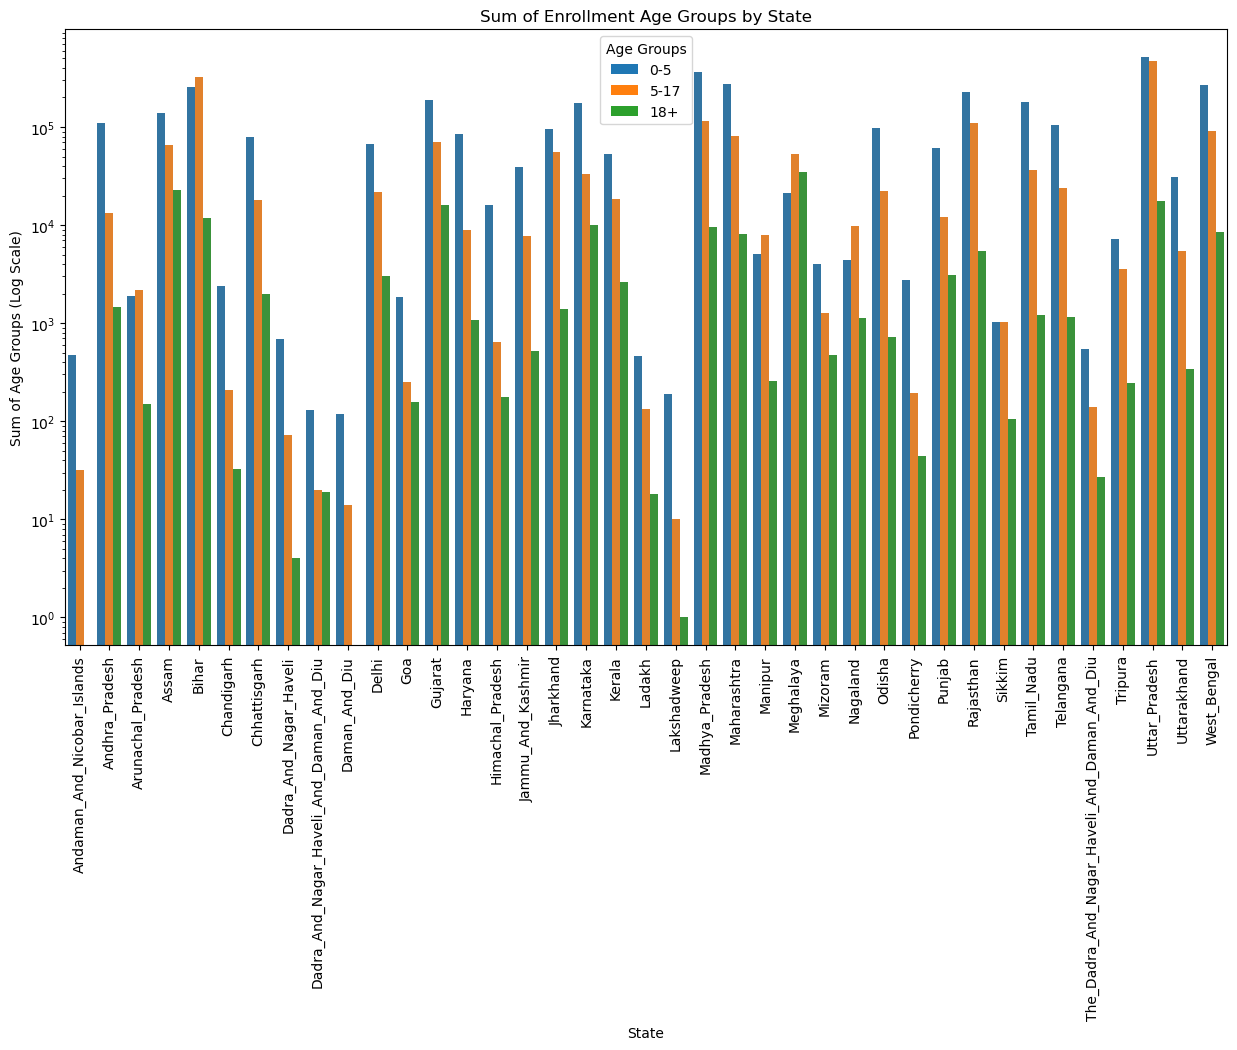

In [40]:
state_enrol_age = df_enrol_main.groupby('state')[['age_0_5','age_5_17', 'age_18_greater']].sum().reset_index()

plt.figure(figsize=(15,8))


sns.barplot(
    data=state_enrol_age.melt(
        id_vars='state',
        value_vars=['age_0_5','age_5_17', 'age_18_greater']
    ),
    x='state',
    y='value',
    hue='variable',
    palette = ['#1f77b4', '#ff7f0e', '#2ca02c']
)

plt.yscale('log')
plt.title('Sum of Enrollment Age Groups by State')
plt.xlabel('State')
plt.ylabel('Sum of Age Groups (Log Scale)')
plt.xticks(rotation=90)

# Custom legend labels (colors already applied)
plt.legend(title='Age Groups', labels=['0-5', '5-17', '18+'])

legend_elements = [
    Patch(facecolor='#1f77b4', label='0-5'),
    Patch(facecolor='#ff7f0e', label='5-17'),
    Patch(facecolor='#2ca02c', label='18+')
]
plt.legend(handles=legend_elements, title='Age Groups')
plt.savefig('graphs/state_enrol_age_groups.png', dpi=300)
plt.show()

In [41]:
# DENSITY PLOTS

In [44]:
# similar to above graphs make density plots for India

In [46]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import json

# Prepare the data (assuming df_bio_main is already loaded)
state_bio_age = df_bio_main.groupby('state')[['bio_age_5_17', 'bio_age_17_']].sum().reset_index()

# Clean state names - replace underscores with spaces for better display
state_bio_age['state_clean'] = state_bio_age['state'].str.replace('_', ' ')

# Load India GeoJSON
india_geojson_url = 'https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson'

# Create subplots with 2 maps side by side
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Age Group 5-17', 'Age Group 17+'),
    specs=[[{'type': 'choropleth'}, {'type': 'choropleth'}]]
)

# First map - Age 5-17
fig.add_trace(
    go.Choropleth(
        geojson=india_geojson_url,
        locations=state_bio_age['state_clean'],
        z=state_bio_age['bio_age_5_17'],
        featureidkey='properties.ST_NM',
        colorscale='Blues',
        colorbar=dict(
            title="Count",
            x=0.45,
            len=0.75
        ),
        showscale=True,
        hovertemplate='<b>%{location}</b><br>Count: %{z:,.0f}<extra></extra>',
        marker_line_color='white',
        marker_line_width=0.5
    ),
    row=1, col=1
)

# Second map - Age 17+
fig.add_trace(
    go.Choropleth(
        geojson=india_geojson_url,
        locations=state_bio_age['state_clean'],
        z=state_bio_age['bio_age_17_'],
        featureidkey='properties.ST_NM',
        colorscale='Oranges',
        colorbar=dict(
            title="Count",
            x=1.02,
            len=0.75
        ),
        showscale=True,
        hovertemplate='<b>%{location}</b><br>Count: %{z:,.0f}<extra></extra>',
        marker_line_color='white',
        marker_line_width=0.5
    ),
    row=1, col=2
)

# Update geo layout for both maps to focus on India
fig.update_geos(
    fitbounds="locations",
    visible=False
)

# Update overall layout
fig.update_layout(
    title_text='Bio Age Groups Distribution by State (India)',
    title_x=0.5,
    height=600,
    width=1400,
    showlegend=False
)

# Save and show
fig.write_html('graphs/state_bio_age_density_maps.html')
fig.show()

# Alternative: Single map with dropdown to switch between age groups
fig_single = go.Figure()

# Add both age groups as separate traces
fig_single.add_trace(
    go.Choropleth(
        geojson=india_geojson_url,
        locations=state_bio_age['state_clean'],
        z=state_bio_age['bio_age_5_17'],
        featureidkey='properties.ST_NM',
        colorscale='Blues',
        colorbar_title="Count",
        name='Age 5-17',
        visible=True,
        hovertemplate='<b>%{location}</b><br>Count: %{z:,.0f}<extra></extra>',
        marker_line_color='white',
        marker_line_width=0.5
    )
)

fig_single.add_trace(
    go.Choropleth(
        geojson=india_geojson_url,
        locations=state_bio_age['state_clean'],
        z=state_bio_age['bio_age_17_'],
        featureidkey='properties.ST_NM',
        colorscale='Oranges',
        colorbar_title="Count",
        name='Age 17+',
        visible=False,
        hovertemplate='<b>%{location}</b><br>Count: %{z:,.0f}<extra></extra>',
        marker_line_color='white',
        marker_line_width=0.5
    )
)

# Add dropdown menu
fig_single.update_layout(
    title_text='Bio Age Groups Distribution by State (India)',
    geo=dict(
        fitbounds="locations",
        visible=False
    ),
    updatemenus=[
        dict(
            buttons=[
                dict(
                    label="Age 5-17",
                    method="update",
                    args=[{"visible": [True, False]},
                          {"title": "Bio Age Group 5-17 Distribution by State (India)"}]
                ),
                dict(
                    label="Age 17+",
                    method="update",
                    args=[{"visible": [False, True]},
                          {"title": "Bio Age Group 17+ Distribution by State (India)"}]
                )
            ],
            direction="down",
            showactive=True,
            x=0.17,
            y=1.15
        )
    ],
    height=700,
    width=900
)

# Save and show
fig_single.write_html('graphs/state_bio_age_density_map_interactive.html')
fig_single.show()

In [53]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

state_enrol_age = df_enrol_main.groupby('state')[['age_0_5','age_5_17', 'age_18_greater']].sum().reset_index()

state_enrol_age['state_clean'] = state_enrol_age['state'].str.replace('_', ' ')

india_geojson_url = 'https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson'

fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=('Age Group 0-5', 'Age Group 5-17', 'Age Group 18+'),
    specs=[[{'type': 'choropleth'}, {'type': 'choropleth'}, {'type': 'choropleth'}]]
)

fig.add_trace(
    go.Choropleth(
        geojson=india_geojson_url,
        locations=state_enrol_age['state_clean'],
        z=state_enrol_age['age_0_5'],
        featureidkey='properties.ST_NM',
        colorscale='Blues',
        colorbar=dict(
            title=dict(text="Count", font=dict(color='white')),
            x=0.30,
            len=0.75,
            tickfont=dict(color='white')
        ),
        showscale=True,
        hovertemplate='<b>%{location}</b><br>Count: %{z:,.0f}<extra></extra>',
        marker_line_color='white',
        marker_line_width=0.5
    ),
    row=1, col=1
)

fig.add_trace(
    go.Choropleth(
        geojson=india_geojson_url,
        locations=state_enrol_age['state_clean'],
        z=state_enrol_age['age_5_17'],
        featureidkey='properties.ST_NM',
        colorscale='Oranges',
        colorbar=dict(
            title=dict(text="Count", font=dict(color='white')),
            x=0.645,
            len=0.75,
            tickfont=dict(color='white')
        ),
        showscale=True,
        hovertemplate='<b>%{location}</b><br>Count: %{z:,.0f}<extra></extra>',
        marker_line_color='white',
        marker_line_width=0.5
    ),
    row=1, col=2
)

fig.add_trace(
    go.Choropleth(
        geojson=india_geojson_url,
        locations=state_enrol_age['state_clean'],
        z=state_enrol_age['age_18_greater'],
        featureidkey='properties.ST_NM',
        colorscale='Greens',
        colorbar=dict(
            title=dict(text="Count", font=dict(color='white')),
            x=1.02,
            len=0.75,
            tickfont=dict(color='white')
        ),
        showscale=True,
        hovertemplate='<b>%{location}</b><br>Count: %{z:,.0f}<extra></extra>',
        marker_line_color='white',
        marker_line_width=0.5
    ),
    row=1, col=3
)

fig.update_geos(
    fitbounds="locations",
    visible=False
)

fig.update_layout(
    title_text='Enrollment Age Groups Distribution by State (India)',
    title_x=0.5,
    height=600,
    width=2100,
    showlegend=False
)

fig.write_html('graphs/state_enrol_age_density_maps.html')
fig.show()

fig_single = go.Figure()

fig_single.add_trace(
    go.Choropleth(
        geojson=india_geojson_url,
        locations=state_enrol_age['state_clean'],
        z=state_enrol_age['age_0_5'],
        featureidkey='properties.ST_NM',
        colorscale='Blues',
        colorbar=dict(title=dict(text="Count", font=dict(color='white')), tickfont=dict(color='white')),
        name='Age 0-5',
        visible=True,
        hovertemplate='<b>%{location}</b><br>Count: %{z:,.0f}<extra></extra>',
        marker_line_color='white',
        marker_line_width=0.5
    )
)

fig_single.add_trace(
    go.Choropleth(
        geojson=india_geojson_url,
        locations=state_enrol_age['state_clean'],
        z=state_enrol_age['age_5_17'],
        featureidkey='properties.ST_NM',
        colorscale='Oranges',
        colorbar=dict(title=dict(text="Count", font=dict(color='white')), tickfont=dict(color='white')),
        name='Age 5-17',
        visible=False,
        hovertemplate='<b>%{location}</b><br>Count: %{z:,.0f}<extra></extra>',
        marker_line_color='white',
        marker_line_width=0.5
    )
)

fig_single.add_trace(
    go.Choropleth(
        geojson=india_geojson_url,
        locations=state_enrol_age['state_clean'],
        z=state_enrol_age['age_18_greater'],
        featureidkey='properties.ST_NM',
        colorscale='Greens',
        colorbar=dict(title=dict(text="Count", font=dict(color='white')), tickfont=dict(color='white')),
        name='Age 18+',
        visible=False,
        hovertemplate='<b>%{location}</b><br>Count: %{z:,.0f}<extra></extra>',
        marker_line_color='white',
        marker_line_width=0.5
    )
)

fig_single.update_layout(
    title_text='Enrollment Age Groups Distribution by State (India)',
    geo=dict(
        fitbounds="locations",
        visible=False
    ),
    updatemenus=[
        dict(
            buttons=[
                dict(
                    label="Age 0-5",
                    method="update",
                    args=[{"visible": [True, False, False]},
                          {"title": "Enrollment Age Group 0-5 Distribution by State (India)"}]
                ),
                dict(
                    label="Age 5-17",
                    method="update",
                    args=[{"visible": [False, True, False]},
                          {"title": "Enrollment Age Group 5-17 Distribution by State (India)"}]
                ),
                dict(
                    label="Age 18+",
                    method="update",
                    args=[{"visible": [False, False, True]},
                          {"title": "Enrollment Age Group 18+ Distribution by State (India)"}]
                )
            ],
            direction="down",
            showactive=True,
            x=0.17,
            y=1.15
        )
    ],
    height=700,
    width=900
)

fig_single.write_html('graphs/state_enrol_age_density_map_interactive.html')
fig_single.show()

In [54]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

state_demo_age = df_demo_main.groupby('state')[['demo_age_5_17', 'demo_age_17_']].sum().reset_index()

state_demo_age['state_clean'] = state_demo_age['state'].str.replace('_', ' ')

india_geojson_url = 'https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson'

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Age Group 5-17', 'Age Group 17+'),
    specs=[[{'type': 'choropleth'}, {'type': 'choropleth'}]]
)

fig.add_trace(
    go.Choropleth(
        geojson=india_geojson_url,
        locations=state_demo_age['state_clean'],
        z=state_demo_age['demo_age_5_17'],
        featureidkey='properties.ST_NM',
        colorscale='Blues',
        colorbar=dict(
            title=dict(text="Count", font=dict(color='white')),
            x=0.45,
            len=0.75,
            tickfont=dict(color='white')
        ),
        showscale=True,
        hovertemplate='<b>%{location}</b><br>Count: %{z:,.0f}<extra></extra>',
        marker_line_color='white',
        marker_line_width=0.5
    ),
    row=1, col=1
)

fig.add_trace(
    go.Choropleth(
        geojson=india_geojson_url,
        locations=state_demo_age['state_clean'],
        z=state_demo_age['demo_age_17_'],
        featureidkey='properties.ST_NM',
        colorscale='Oranges',
        colorbar=dict(
            title=dict(text="Count", font=dict(color='white')),
            x=1.02,
            len=0.75,
            tickfont=dict(color='white')
        ),
        showscale=True,
        hovertemplate='<b>%{location}</b><br>Count: %{z:,.0f}<extra></extra>',
        marker_line_color='white',
        marker_line_width=0.5
    ),
    row=1, col=2
)

fig.update_geos(
    fitbounds="locations",
    visible=False
)

fig.update_layout(
    title_text='Demo Age Groups Distribution by State (India)',
    title_x=0.5,
    height=600,
    width=1400,
    showlegend=False
)

fig.write_html('graphs/state_demo_age_density_maps.html')
fig.show()

fig_single = go.Figure()

fig_single.add_trace(
    go.Choropleth(
        geojson=india_geojson_url,
        locations=state_demo_age['state_clean'],
        z=state_demo_age['demo_age_5_17'],
        featureidkey='properties.ST_NM',
        colorscale='Blues',
        colorbar=dict(title=dict(text="Count", font=dict(color='white')), tickfont=dict(color='white')),
        name='Age 5-17',
        visible=True,
        hovertemplate='<b>%{location}</b><br>Count: %{z:,.0f}<extra></extra>',
        marker_line_color='white',
        marker_line_width=0.5
    )
)

fig_single.add_trace(
    go.Choropleth(
        geojson=india_geojson_url,
        locations=state_demo_age['state_clean'],
        z=state_demo_age['demo_age_17_'],
        featureidkey='properties.ST_NM',
        colorscale='Oranges',
        colorbar=dict(title=dict(text="Count", font=dict(color='white')), tickfont=dict(color='white')),
        name='Age 17+',
        visible=False,
        hovertemplate='<b>%{location}</b><br>Count: %{z:,.0f}<extra></extra>',
        marker_line_color='white',
        marker_line_width=0.5
    )
)

fig_single.update_layout(
    title_text='Demo Age Groups Distribution by State (India)',
    geo=dict(
        fitbounds="locations",
        visible=False
    ),
    updatemenus=[
        dict(
            buttons=[
                dict(
                    label="Age 5-17",
                    method="update",
                    args=[{"visible": [True, False]},
                          {"title": "Demo Age Group 5-17 Distribution by State (India)"}]
                ),
                dict(
                    label="Age 17+",
                    method="update",
                    args=[{"visible": [False, True]},
                          {"title": "Demo Age Group 17+ Distribution by State (India)"}]
                )
            ],
            direction="down",
            showactive=True,
            x=0.17,
            y=1.15
        )
    ],
    height=700,
    width=900
)

fig_single.write_html('graphs/state_demo_age_density_map_interactive.html')
fig_single.show()